# Statystyczna analiza danych

## Wprowadzenie

In [ ]:
# ToDo:
# Opis datasetow - co mamy?


## Czyszczenie i porządkowanie danych

In [ ]:
#ToDo:
# Ujednolicenie nazw kolumn i kolejnosc
# Dopasowanie typów danych
# Uzupełnienie brakujących danych 

In [1]:
#import wszystkich potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import kagglehub


In [2]:
# Download latest version
path = kagglehub.dataset_download("mathurinache/world-happiness-report")

print("Path to dataset files:", path)

Path to dataset files: /home/joanna/.cache/kagglehub/datasets/mathurinache/world-happiness-report/versions/2


In [4]:
df_2015 = pd.read_csv(path + "/2015.csv")
df_2016 = pd.read_csv(path + "/2016.csv")
df_2017 = pd.read_csv(path + "/2017.csv")
df_2018 = pd.read_csv(path + "/2018.csv")
df_2019 = pd.read_csv(path + "/2019.csv")
df_2020 = pd.read_csv(path + "/2020.csv")
df_2021 = pd.read_csv(path + "/2021.csv")
df_2022 = pd.read_csv(path + "/2022.csv")

In [5]:
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]


In [5]:
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Przejrzymy nazwy kolumn

In [ ]:
if not df_list:
    print(" 'df_list' jest pusta.")
else:
    for i, df in enumerate(df_list):
        print(f"--- Rok {i+2015}  ---")

        if isinstance(df, pd.DataFrame):
            column_names = df.columns.tolist()
            print("Nazwy kolumn:")
            if column_names:
                for col_name in column_names:
                    print(f"- {col_name}")
            else:
                print("(Ta ramka nie zawiera kolumn.)")
        else:
            print(f"Element {i} nie jest typem Pandas DataFrame. Type: {type(df)}")
rower
        print("\n") 

    print("--- Koniec procesu ---")

--- Rok 2015  ---
Nazwy kolumn:
- Country
- Region
- Happiness Rank
- Happiness Score
- Standard Error
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual


--- Rok 2016  ---
Nazwy kolumn:
- Country
- Region
- Happiness Rank
- Happiness Score
- Lower Confidence Interval
- Upper Confidence Interval
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual


--- Rok 2017  ---
Nazwy kolumn:
- Country
- Happiness.Rank
- Happiness.Score
- Whisker.high
- Whisker.low
- Economy..GDP.per.Capita.
- Family
- Health..Life.Expectancy.
- Freedom
- Generosity
- Trust..Government.Corruption.
- Dystopia.Residual


--- Rok 2018  ---
Nazwy kolumn:
- Overall rank
- Country or region
- Score
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption


--- Rok 2019  ---
Na

#### Stworzenie df, ktora podsumowuje wszystkie df

In [35]:
from IPython.display import display, HTML

# Nazwy kolumn wylistowane po przecinku
summary_data = []
for i, df in enumerate(df_list):
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Indeks": f"Rok {i+2015}",
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Indeks": f"Item {i+1}",
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

summary_df_str = pd.DataFrame(summary_data)


# Styl tabeli
styles = [
    dict(selector="th", props=[("text-align", "left")]),
     dict(selector="td", props=[("text-align", "left")]),
     dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
 ]
display(summary_df_str.style.set_table_styles(styles))


,Indeks,Liczba kolumn,Nazwy kolumn
0,Rok 2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,Rok 2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,Rok 2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,Rok 2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,Rok 2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,Rok 2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
6,Rok 2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
7,Rok 2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, Explained by: GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption"


Można zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

In [ ]:
df_2025

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

Text(0.5, 1.0, 'RANK 2022')

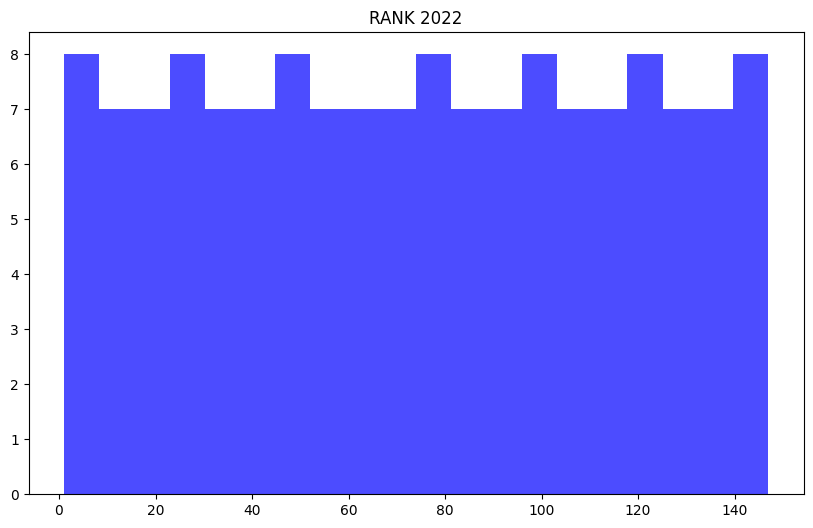

In [44]:
df_2022.hist(column="RANK", bins=20, grid=False, figsize=(10, 6), color='blue', alpha=0.7)
plt.title("RANK 2022")

## Wizualizacje 

Generating 8 histograms in a 4x2 grid for column 'your_column_name'.


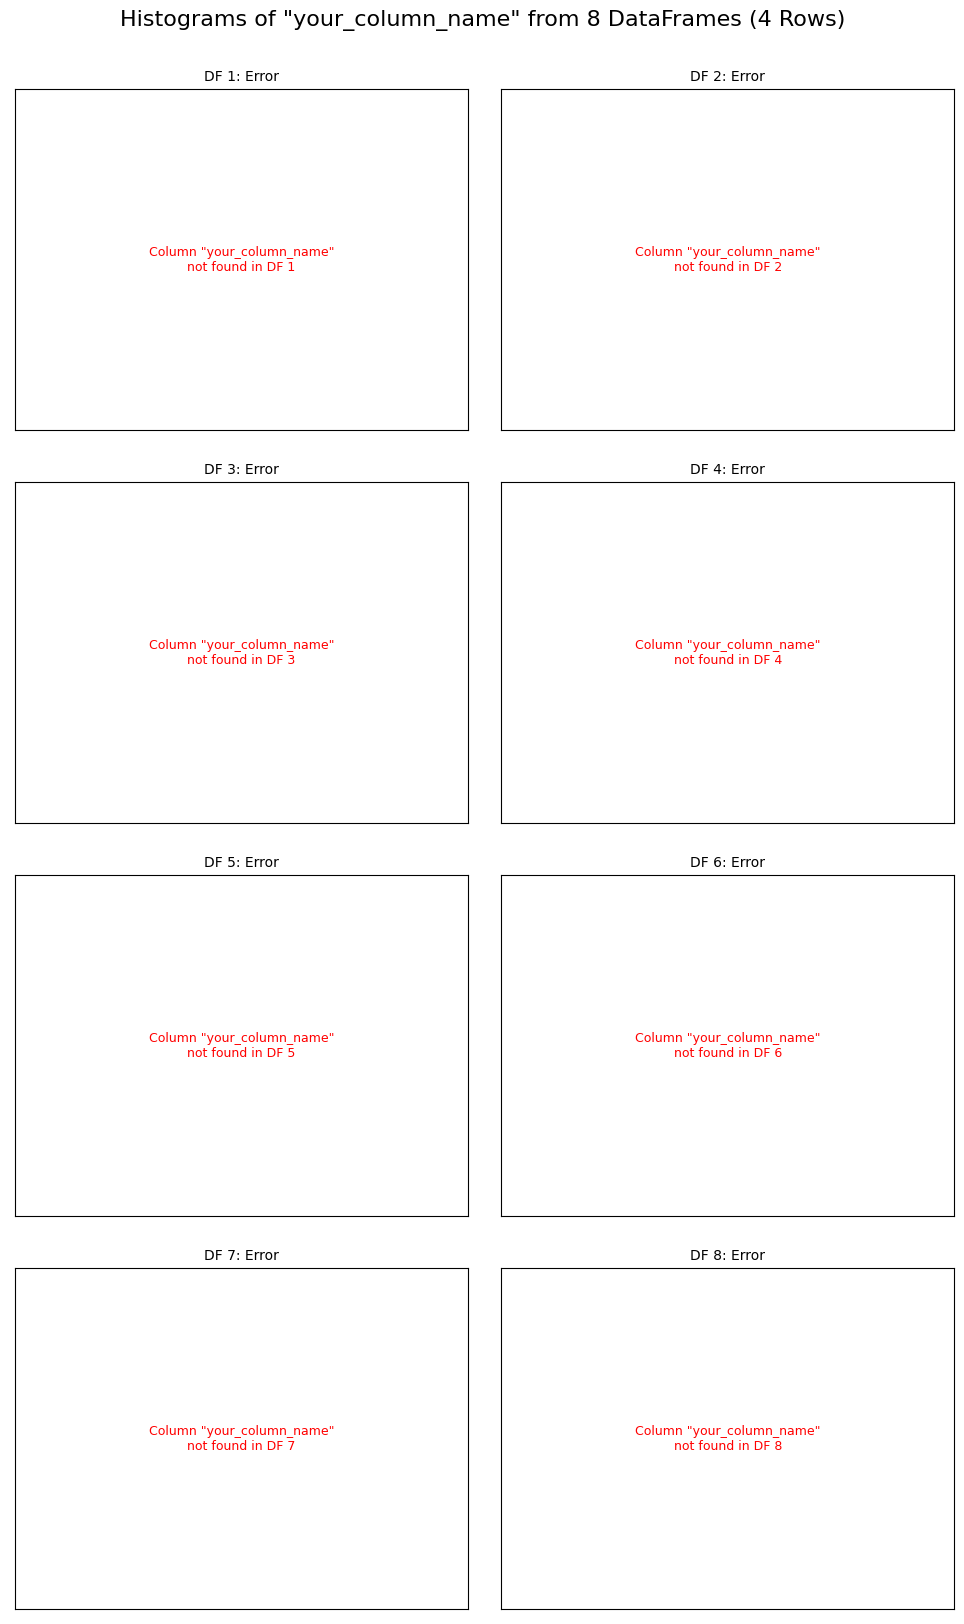

In [ ]:

# --- 1. Specify the column you want to plot ---
# IMPORTANT: Replace 'your_column_name' with the actual name of the column
# you want to generate a histogram for from each DataFrame.
column_to_plot = 'your_column_name' # <<< CHANGE THIS TO YOUR COLUMN NAME

# --- 2. Plotting Logic ---
if not 'df_list' in locals() or not df_list:
    print("It seems 'df_list' is not defined or is empty.")
    print("Please ensure your df_list is populated with DataFrames.")
else:
    num_dfs = len(df_list)

    if num_dfs == 0:
        print("Your df_list is empty. Nothing to plot!")
    else:
        # Define the number of rows for your subplot grid
        nrows = 4
        # Calculate the number of columns needed
        ncols = math.ceil(num_dfs / nrows)

        # Create the figure and subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

        # Flatten the axes array for easier iteration
        if num_dfs == 1:
            if not isinstance(axes, np.ndarray):
                axes_flat = [axes]
            else:
                axes_flat = axes.flatten()
        elif nrows == 1 or ncols == 1:
             axes_flat = axes if isinstance(axes, np.ndarray) else [axes] # Ensure it's iterable
             if isinstance(axes_flat, np.ndarray) and axes_flat.ndim > 1 : # if it was 1 row N cols or N rows 1 col
                 axes_flat = axes_flat.flatten()
        else:
            axes_flat = axes.flatten()

        print(f"Generating {num_dfs} histograms in a {nrows}x{ncols} grid for column '{column_to_plot}'.")

        for i, df in enumerate(df_list):
            ax = axes_flat[i]

            if column_to_plot in df.columns:
                sns.histplot(data=df, x=column_to_plot, ax=ax, kde=True)
                ax.set_title(f'DF {i+1}: {column_to_plot}', fontsize=10)
                ax.set_xlabel(column_to_plot, fontsize=8)
                ax.set_ylabel('Frequency', fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=7)
            else:
                ax.text(0.5, 0.5, f'Column "{column_to_plot}"\nnot found in DF {i+1}',
                        horizontalalignment='center', verticalalignment='center',
                        transform=ax.transAxes, fontsize=9, color='red')
                ax.set_title(f'DF {i+1}: Error', fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])

        # Hide any unused subplots
        for j in range(num_dfs, len(axes_flat)):
            fig.delaxes(axes_flat[j])

        plt.tight_layout(pad=2.0)
        plt.suptitle(f'Histograms of "{column_to_plot}" from {num_dfs} DataFrames (4 Rows)', fontsize=16, y=1.02)
        plt.show()

## Analiza opisowa

- przyjrzenie się krajom, ktore mają najwyższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają najniższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają największy wzrost wskaźnika szczęścia
- przyjrzenie się krajom, ktore mają największy spadek wskaźnika szczęścia
- czy COVID-19 miał wpływ na wskaźnik szczęścia?

## Wnioski

In [ ]:
#TBD